In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Titanic ini berisi informasi tentang penumpang kapal Titanic. Setiap baris mewakili satu orang penumpang, dan ada **12 kolom** yang menjelaskan berbagai informasi. **Kolom PassengerId** adalah nomor urut penumpang. **Survived** menunjukkan apakah penumpang selamat (1) atau tidak (0). **Pclass** menunjukkan kelas tiket: 1 (kelas satu), 2 (kelas dua), atau 3 (kelas tiga). **Name** berisi nama lengkap penumpang, dan **Sex** menunjukkan jenis kelamin.

**Kolom Age** mencatat usia penumpang. **SibSp** menunjukkan jumlah saudara kandung atau pasangan yang ikut, sedangkan **Parch** menunjukkan jumlah orang tua atau anak yang ikut. **Ticket** adalah nomor tiket, dan **Fare** adalah harga tiket. Kolom **Cabin** berisi nomor kabin (jika ada), dan **Embarked** menunjukkan pelabuhan keberangkatan: C (Cherbourg), Q (Queenstown), atau S (Southampton).

Dataset ini sering digunakan untuk menganalisis siapa saja yang lebih mungkin selamat berdasarkan data tersebut.

In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Dataset ini memiliki 890 pengamatan

In [5]:
count_values = df['Embarked'].value_counts()
count_values

,count
Embarked,
S,644
C,168
Q,77


In [7]:
# Menghitung rata-rata berdasarkan nilai 'Embarked' hanya untuk kolom numerik yang ada
mean_by_charges = df.groupby('Embarked')[['Age', 'SibSp', 'Parch', 'Fare']].mean()
# Mengganti 'age', 'bmi', 'children' dengan kolom yang ada di dataframe, seperti 'Age', 'SibSp', 'Parch', 'Fare'

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Embarked'
print(mean_by_charges)

                Age     SibSp     Parch       Fare
Embarked                                          
C         30.814769  0.386905  0.363095  59.954144
Q         28.089286  0.428571  0.168831  13.276030
S         29.445397  0.571429  0.413043  27.079812


# PREPROCESSING DATA

In [8]:
# Encode data kategorik
df_processed = df.copy()
label_encoders = {}
categorical_cols = df_processed.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

Mengubah kolom kategori (sex, cabin) menjadi angka agar bisa digunakan oleh model machine learning.


In [10]:
# Buat target klasifikasi binary berdasarkan median Fare
threshold = df_processed['Fare'].median()
df_processed['high_cost'] = (df_processed['Fare'] > threshold).astype(int)

In [12]:
# Pisahkan fitur dan target
X = df_processed.drop(columns=['Fare', 'high_cost'])
y = df_processed['high_cost']

Memisahkan data menjadi fitur (X) dan target (y).

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Membagi data menjadi 70% latih dan 30% uji.

Menstandardisasi fitur agar skala data seragam (penting untuk algoritma KNN dan Naive Bayes).

# NAVIE BAYES & KNN


In [18]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)


Melatih model Naive Bayes Gaussian, yang mengasumsikan bahwa fitur mengikuti distribusi normal.

In [19]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

Melatih model KNN dengan k=5, yang memprediksi berdasarkan mayoritas label dari 5 tetangga terdekat.

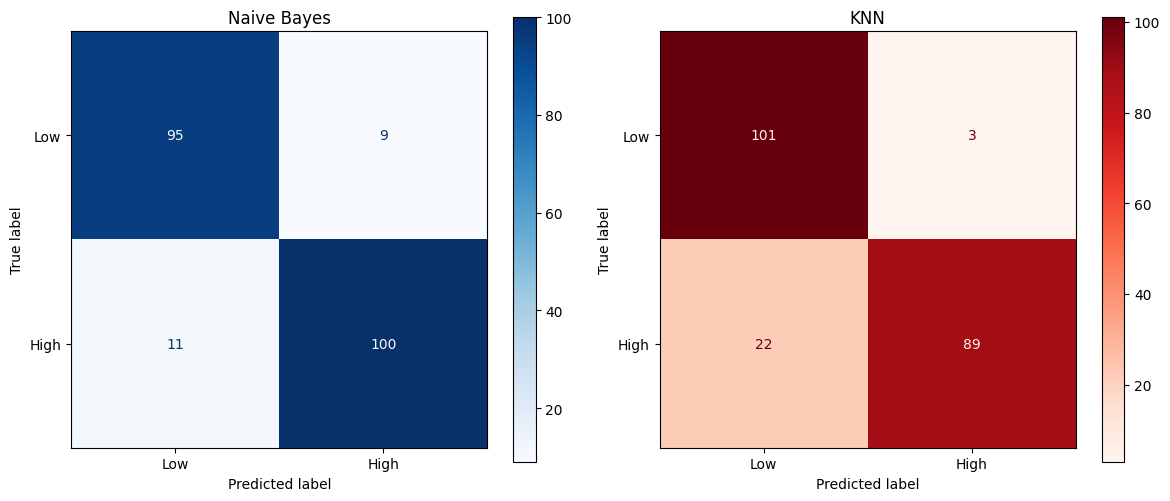

In [25]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

# Calculate confusion matrix for Naive Bayes
from sklearn.metrics import confusion_matrix # Make sure confusion_matrix is imported
cm_nb = confusion_matrix(y_test, y_pred_nb)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Tampilkan confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_nb, display_labels=['Low', 'High']).plot(ax=ax[0], cmap='Blues')
ax[0].set_title("Naive Bayes")

ConfusionMatrixDisplay(cm_knn, display_labels=['Low', 'High']).plot(ax=ax[1], cmap='Reds')
ax[1].set_title("KNN")

plt.tight_layout()
plt.show()

* Menghitung akurasi dan prediksi
* Menampilkan confusion matrix untuk melihat perfoma klasifikasi

1.  True Positive, True Negative
2.   List item

In [29]:
# Calculate accuracy for Naive Bayes and KNN
from sklearn.metrics import accuracy_score # Import accuracy_score if not already done

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Now you can print the accuracies
print(f"Akurasi Naive Bayes: {accuracy_nb * 100:.2f}%")
print(f"Akurasi KNN: {accuracy_knn * 100:.2f}%")

Akurasi Naive Bayes: 90.70%
Akurasi KNN: 88.37%


# KESIMPULAN
**KESIMPULAN**

Berdasarkan hasil klasifikasi pada dataset Titanic menggunakan algoritma Naive Bayes dan K-Nearest Neighbors (KNN), diketahui bahwa Naive Bayes memiliki akurasi lebih tinggi, yaitu 90,70%, dibandingkan dengan KNN yang memiliki akurasi sebesar 88,37%. Hal ini menunjukkan bahwa Naive Bayes lebih efektif dalam mengenali pola data dalam konteks prediksi kelangsungan hidup penumpang Titanic. Kemungkinan, karakteristik data seperti hubungan antar fitur yang mendekati independen serta distribusi yang cukup sesuai dengan asumsi Naive Bayes membuat model ini bekerja lebih optimal. Sementara itu, meskipun KNN cukup fleksibel karena tidak mengasumsikan bentuk distribusi data tertentu, kinerjanya sedikit lebih rendah pada dataset ini. Oleh karena itu, Naive Bayes dapat dianggap sebagai model yang lebih tepat untuk klasifikasi kelangsungan hidup penumpang Titanic berdasarkan data yang tersedia.